# Réduction de dimension avec t-SNE sur MNIST

## 1. Objectif

Ce notebook applique le **t-SNE** (t-distributed Stochastic Neighbor Embedding), une méthode **non linéaire de réduction de dimension**, pour visualiser les données MNIST en 2D.

Nous allons comparer les résultats avec ceux obtenus via la **PCA**, et observer si les **classes de chiffres manuscrits** sont mieux séparées dans l’espace réduit.

À la différence de la PCA :
- le t-SNE cherche à **préserver les distances locales** entre les points,
- il est donc **plus adapté à la visualisation** des structures complexes.

## 2. Qu’est-ce que le t-SNE ?

Le **t-SNE** est une technique de réduction de dimension **non linéaire**.

Il :
- modélise les similarités entre points dans l’espace original,
- essaie de les reproduire dans un **espace réduit à 2 ou 3 dimensions**,
- est principalement utilisé pour la **visualisation**.

Il est très bon pour séparer des groupes proches, mais :
- il est **lent** sur de grands datasets,
- il **n’est pas déterministe** (résultats peuvent varier),
- il **ne conserve pas la structure globale** des données.

In [3]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Config
sns.set(style="whitegrid")
%matplotlib inline

In [6]:
# Chargement des données
df = pd.read_csv("../data/mnist.csv")

# Vérifier les noms de colonnes
print(df.columns[:10])

# Utiliser la première colonne comme label
label_col = df.columns[0]
X = df.drop(label_col, axis=1)
y = df[label_col]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], dtype='object')


## 3. Application du t-SNE (t-distributed Stochastic Neighbor Embedding)

Nous allons maintenant projeter les images MNIST dans un espace à **2 dimensions** en utilisant **t-SNE**, une méthode **non linéaire** de réduction de dimension.

---

### Pourquoi réduire la dimension ?

- Chaque image MNIST est un point dans un **espace à 784 dimensions** (28x28 pixels).
- Cet espace est trop complexe pour l’analyse humaine.
- L’objectif est de projeter ces points dans un espace **2D** pour pouvoir :
  - **visualiser la structure** des données,
  - **préparer un clustering ou une classification**.

---

### Pourquoi utiliser t-SNE ?

Contrairement à la PCA :
- t-SNE **préserve mieux les relations locales** (les voisins proches restent proches).
- Il est conçu pour la **visualisation** de données complexes et non linéaires.
- Il permet souvent de **mieux séparer visuellement les classes**.

**Inconvénients** :
- t-SNE est **lent** (surtout sur de grands jeux de données),
- Les résultats peuvent **varier d’une exécution à l’autre**,
- Il **ne permet pas de projeter de nouvelles données** sans tout recalculer.

---

### Comment fonctionne le t-SNE ? (Résumé technique simplifié)

1. **Similarité dans l’espace d’origine**  
   On calcule, pour chaque paire \( x_i, x_j \), une probabilité \( p_{j|i} \) que \( x_j \) soit un voisin de \( x_i \) :

   \[
   p_{j|i} = \frac{\exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{\|x_i - x_k\|^2}{2\sigma_i^2}\right)}
   \]

2. **Symétrisation des probabilités** :

   \[
   p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
   \]

3. **Projection et similarité dans l’espace réduit**  
   On projette les données en 2D, et on calcule des \( q_{ij} \) avec une distribution de Student :

   \[
   q_{ij} = \frac{\left(1 + \|y_i - y_j\|^2\right)^{-1}}{\sum_{k \neq l} \left(1 + \|y_k - y_l\|^2\right)^{-1}}
   \]

4. **Minimisation de la divergence KL**  
   On ajuste les positions \( y_i \) pour que les distributions \( P \) (original) et \( Q \) (réduite) soient proches :

   \[
   C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
   \]

---

### Détails d’implémentation

```python
N = 35000
X_small = X_scaled[:N]
y_small = y[:N]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_small)
```

`n_components=2` : on veut une visualisation en 2D.

`perplexity=30` : équilibre entre local et global (nombre de voisins).

`random_state=42` : pour rendre l’expérience reproductible.

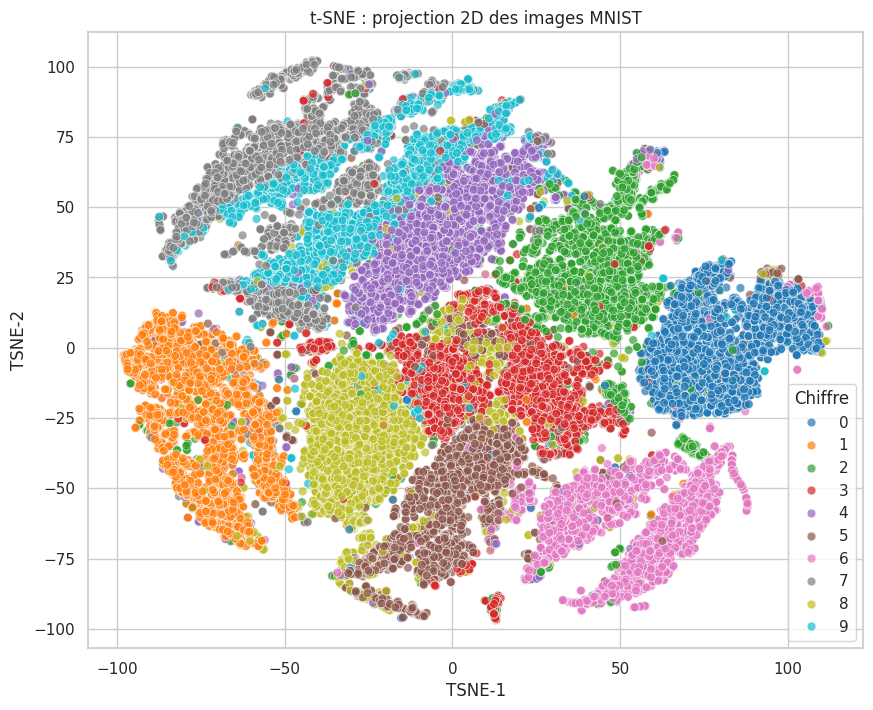

In [ ]:
# Réduire le dataset pour le t-SNE
N = 35000 # Avec juste 5000 points, on peut déjà un résultat intéressant
X_small = X_scaled[:N]
y_small = y[:N]

# Appliquer le t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_small)

# Créer un DataFrame avec les résultats
df_tsne = pd.DataFrame({
    "TSNE-1": X_tsne[:, 0],
    "TSNE-2": X_tsne[:, 1],
    "label": y_small
})

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_tsne,
    x="TSNE-1", y="TSNE-2",
    hue="label",
    palette="tab10",
    alpha=0.7,
    s=40
)
plt.title("t-SNE : projection 2D des images MNIST")
plt.legend(title="Chiffre")
plt.show()


## 4. Interprétation du t-SNE sur 35 000 images MNIST

### Structure observée :

- Chaque **point** représente une image de chiffre manuscrit.
- Les **couleurs** représentent les chiffres réels (labels de 0 à 9).
- Les axes `TSNE-1` et `TSNE-2` sont des dimensions **créées automatiquement par l'algorithme**. Elles n'ont pas de signification directe.

---

### Observations majeures :

- **Clustering bien défini** :
  - Les chiffres comme `1`, `0`, `2`, `6` ou `7` forment des **groupes compacts et séparés**.
  - Le t-SNE a bien **capté la structure locale** du dataset.

- **Certains clusters proches mais distincts** :
  - `3`, `5`, `8` sont souvent plus proches car ils ont des **formes similaires manuscrites**.
  - Ils ne se chevauchent pas trop, mais il y a quelques **zones d’ambiguïté** (des points mélangés entre 5 et 3 par exemple).

- **Légère superposition (overlap)** :
  - Quelques chiffres comme `4`, `9`, ou `7` ont **des frontières un peu plus floues** avec d'autres clusters (normal, car certains manuscrits sont ambigus même pour un humain).

---

### En résumé :

- Le t-SNE fait un **excellent travail de visualisation** sur un jeu de données aussi complexe.
- Il permet de **voir clairement la structure des données**, contrairement à la PCA 2D.
- Il **prévient bien les confusions** sur les classes facilement distinguables (`1`, `0`, `6`, etc.).
- C’est une **méthode de choix** pour explorer visuellement des données non linéaires.

---

### Limitations à garder en tête :

- Le t-SNE ne permet **pas de projeter de nouvelles données** facilement.
- Il est **lent**, surtout à plus de 50k points.
- Les **distances entre clusters** ne sont **pas significatives globalement** : on ne peut pas dire que le cluster de `1` est "plus proche" de `3` que de `7`.
